In [37]:
import sys
sys.path.insert(0, '..')

In [38]:
from src.eventstream import Eventstream, EventstreamSchema, RawDataSchema
import pandas as pd
from src import datasets

raw_data_schema = RawDataSchema(
    event_name="event", event_timestamp="timestamp", user_id="user_id")

source: Eventstream = datasets.load_simple_shop()

In [39]:
funnel_params = {'stages':['catalog', 'cart', 'payment_done']}

In [40]:
source.funnel(**funnel_params).plot()

In [41]:
ff = source.funnel(**funnel_params)
ff.values

unique_users  %_of_initial  %_of_total
segment_name stages                                              
all users    catalog               3611        100.00      100.00
             cart                  1924         53.28       53.28
             payment_done           653         33.94       18.08

In [42]:
ff.plot()

In [43]:
from src.tooling.funnel import Funnel
ff = Funnel(source, **funnel_params)

In [44]:
ff.fit()

In [45]:
ff.res_dict

{'all users': {'stages': ['catalog', 'cart', 'payment_done'],
  'values': [3611, 1924, 653]}}

In [46]:
ff.values

unique_users  %_of_initial  %_of_total
segment_name stages                                              
all users    catalog               3611        100.00      100.00
             cart                  1924         53.28       53.28
             payment_done           653         33.94       18.08

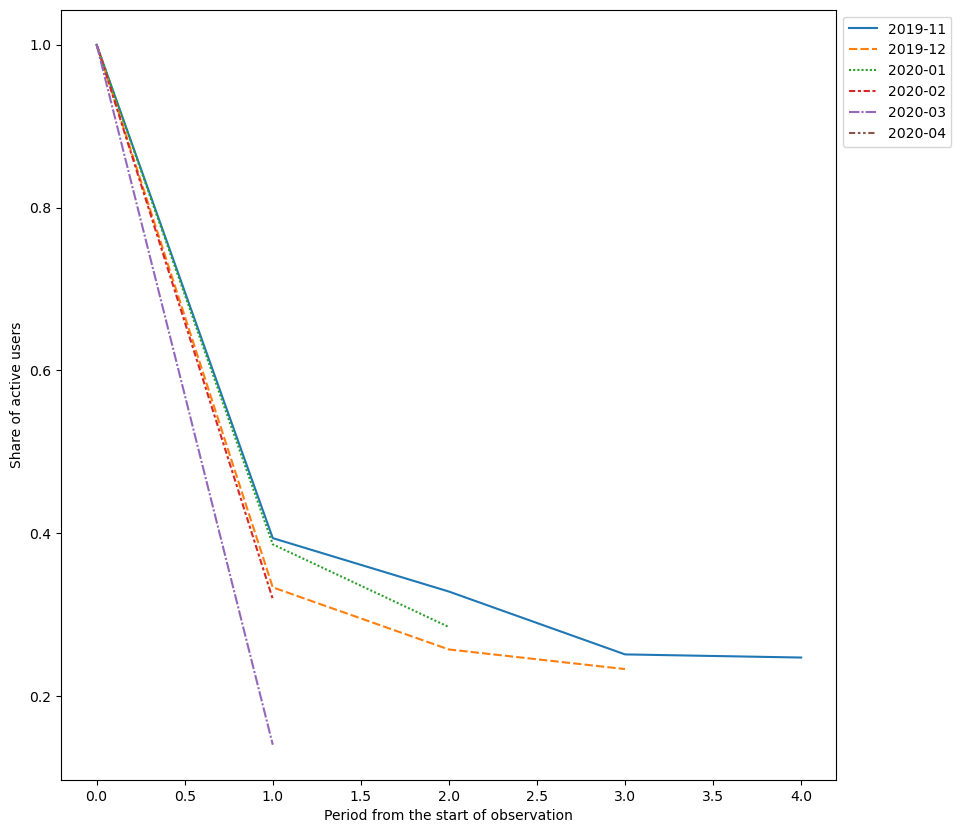

In [47]:
source.cohorts(cohort_start_unit='M',
                  cohort_period=(1,'M'),
                  average=False,
                  cut_bottom=0,
                  cut_right=0,
                  cut_diagonal=0).lineplot()

In [48]:
from src.tooling.cohorts import Cohorts
cc = Cohorts(source,
             cohort_start_unit='M',
                  cohort_period=(1,'M'),
                  average=False,
                  cut_bottom=0,
                  cut_right=0,
                  cut_diagonal=0)
cc.fit()

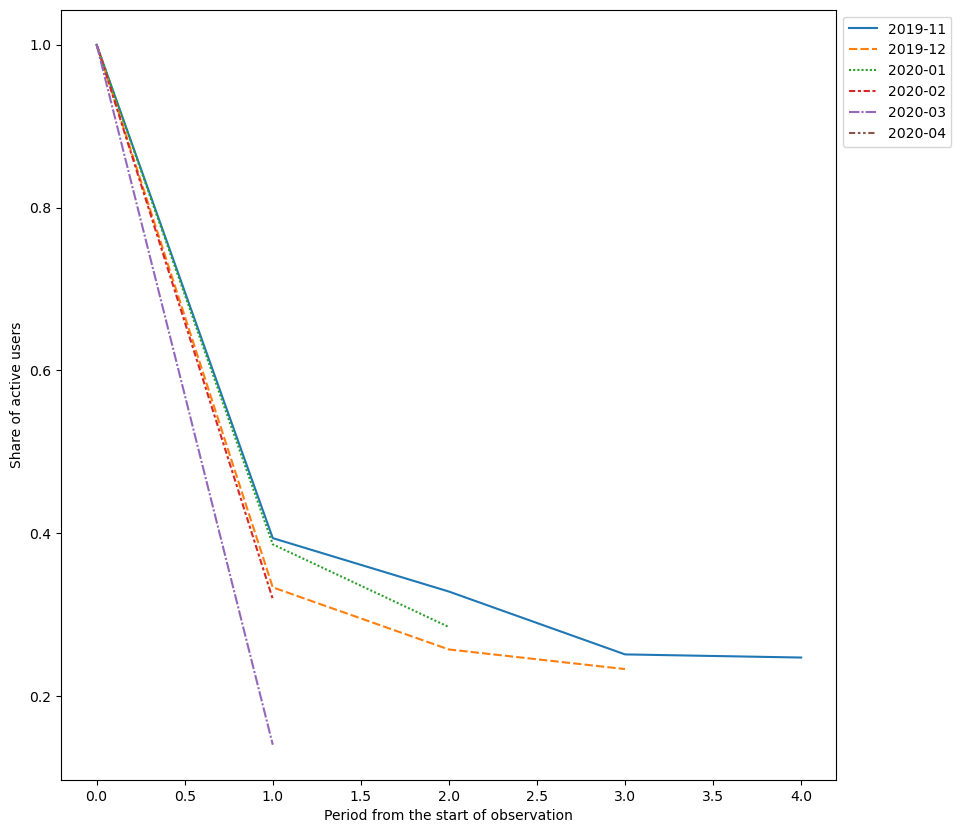

In [49]:
cc.lineplot()

In [50]:
source.step_sankey(max_steps=5).plot()

In [51]:
source.step_sankey(max_steps=5).values

(    step       event_name  usr_cnt  usr_cnt_total   perc            color  \
 0      1          catalog     2686           3751  71.61   (80, 190, 151)   
 1      1             main     1065           3751  28.39   (228, 101, 92)   
 2      2          catalog     1670           3751  44.52   (80, 190, 151)   
 3      2             main      609           3751  16.24   (228, 101, 92)   
 4      2             lost      443           3751  11.81    (62, 80, 102)   
 5      2         product2      429           3751  11.44     (53, 58, 62)   
 6      2             cart      337           3751   8.98  (191, 214, 222)   
 7      2         product1      263           3751   7.01  (252, 200, 101)   
 8      3          catalog     1441           3308  43.56   (80, 190, 151)   
 9      3             main      457           3308  13.81   (228, 101, 92)   
 10     3             lost      380           3308  11.49    (62, 80, 102)   
 11     3         product2      247           3308   7.47     (5

In [52]:
source.step_sankey(max_steps=5).values[0]

,step,event_name,usr_cnt,usr_cnt_total,perc,color,index,sorting,order_by
0,1,catalog,2686,3751,71.61,"(80, 190, 151)",0,100,100
1,1,main,1065,3751,28.39,"(228, 101, 92)",1,100,100
2,2,catalog,1670,3751,44.52,"(80, 190, 151)",2,100,0
3,2,main,609,3751,16.24,"(228, 101, 92)",3,100,1
4,2,lost,443,3751,11.81,"(62, 80, 102)",4,100,100
5,2,product2,429,3751,11.44,"(53, 58, 62)",5,100,100
6,2,cart,337,3751,8.98,"(191, 214, 222)",6,100,100
7,2,product1,263,3751,7.01,"(252, 200, 101)",7,100,100
8,3,catalog,1441,3308,43.56,"(80, 190, 151)",8,100,2
9,3,main,457,3308,13.81,"(228, 101, 92)",9,100,3


In [53]:
source.step_matrix(5, targets=['lost'], thresh=0.2).values[1]

,1,2,3,4,5
lost,0.0,0.118102,0.101306,0.093842,0.07518


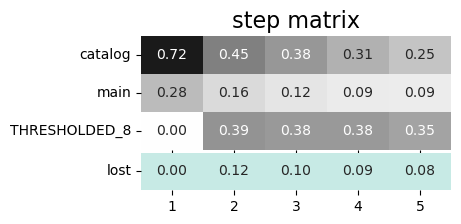

In [54]:
source.step_matrix(5, targets=['lost'], thresh=0.2).plot()